Shape: (32581, 12)


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4



--- Numeric columns ---
['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

--- Categorical columns ---
['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


/var/folders/zx/cdh1t2kj2l9gdcq64pwvxwdm0000gn/T/ipykernel_4478/2823772771.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=TARGET, data=df, palette="Set2")


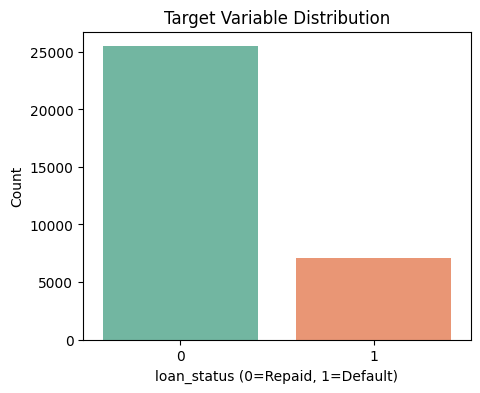

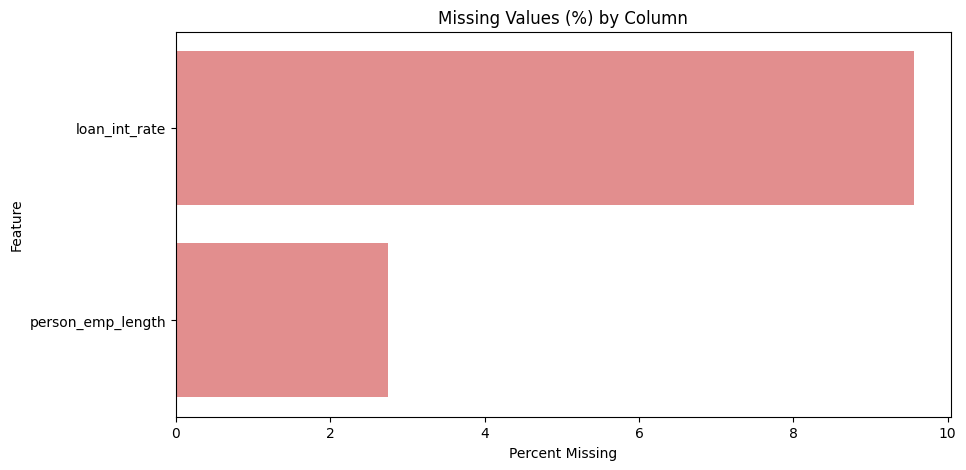

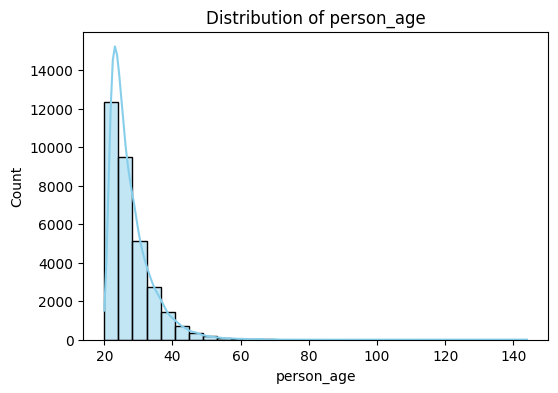

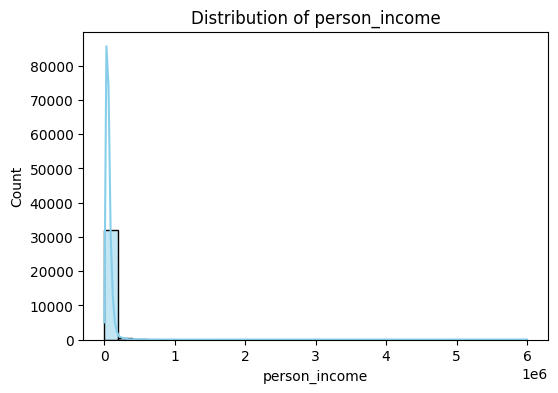

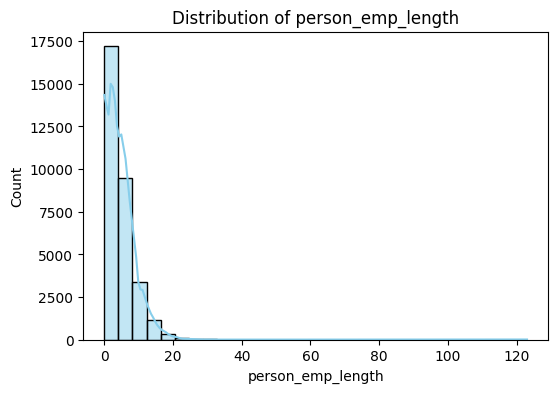

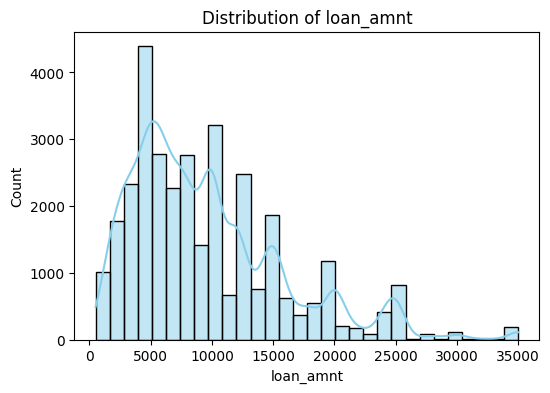

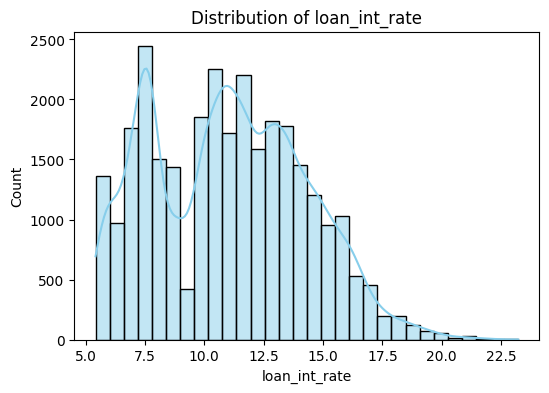

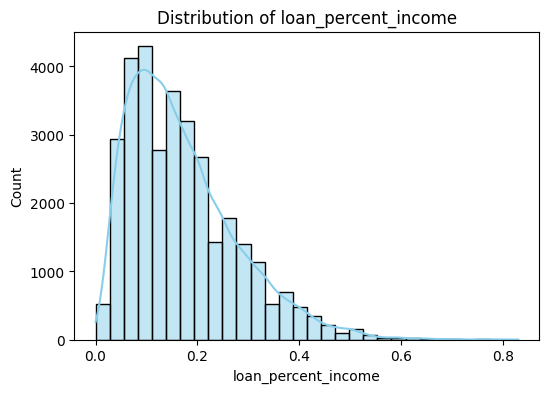

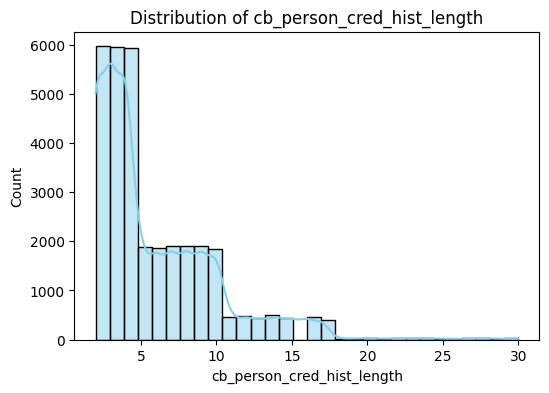

/var/folders/zx/cdh1t2kj2l9gdcq64pwvxwdm0000gn/T/ipykernel_4478/2823772771.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=TARGET, y=col, data=df, palette="Set3")


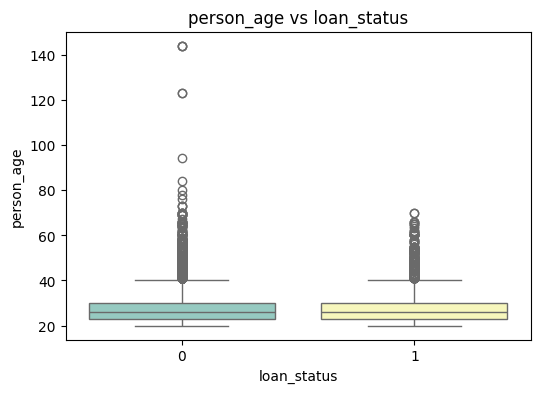

/var/folders/zx/cdh1t2kj2l9gdcq64pwvxwdm0000gn/T/ipykernel_4478/2823772771.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=TARGET, y=col, data=df, palette="Set3")


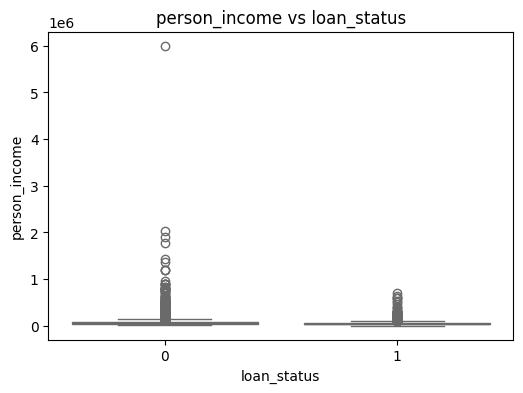

/var/folders/zx/cdh1t2kj2l9gdcq64pwvxwdm0000gn/T/ipykernel_4478/2823772771.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=TARGET, y=col, data=df, palette="Set3")


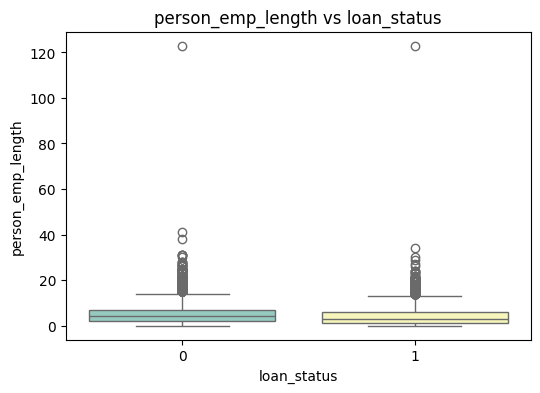

/var/folders/zx/cdh1t2kj2l9gdcq64pwvxwdm0000gn/T/ipykernel_4478/2823772771.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=TARGET, y=col, data=df, palette="Set3")


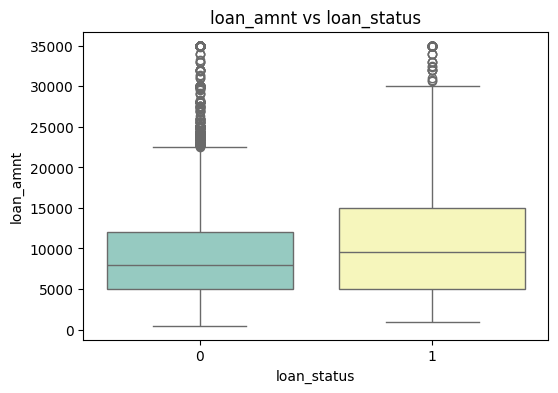

/var/folders/zx/cdh1t2kj2l9gdcq64pwvxwdm0000gn/T/ipykernel_4478/2823772771.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=TARGET, y=col, data=df, palette="Set3")


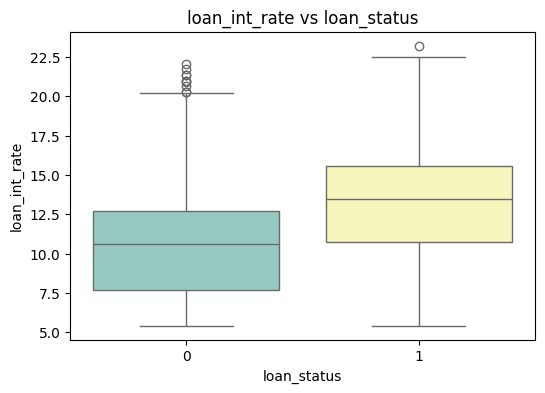

/var/folders/zx/cdh1t2kj2l9gdcq64pwvxwdm0000gn/T/ipykernel_4478/2823772771.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=TARGET, y=col, data=df, palette="Set3")


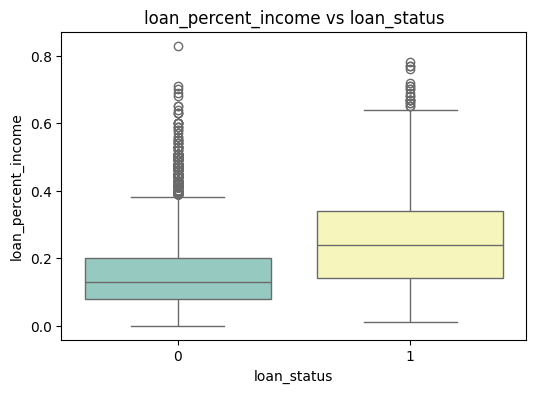

/var/folders/zx/cdh1t2kj2l9gdcq64pwvxwdm0000gn/T/ipykernel_4478/2823772771.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=TARGET, y=col, data=df, palette="Set3")


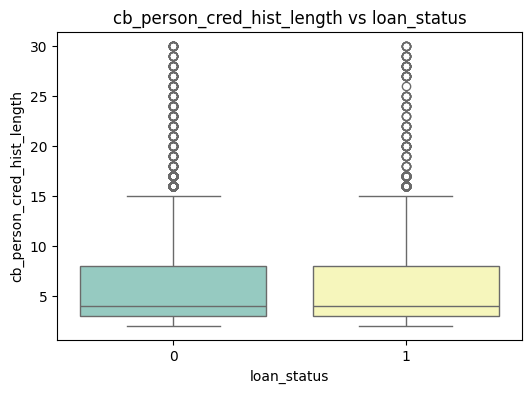

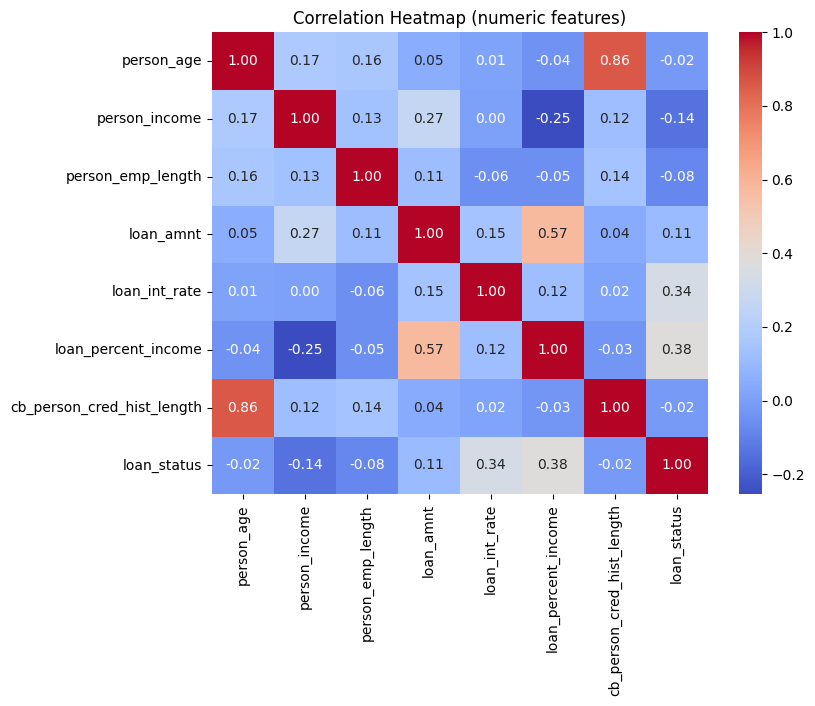

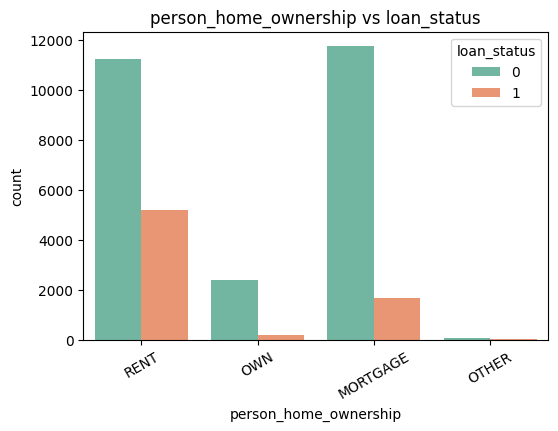

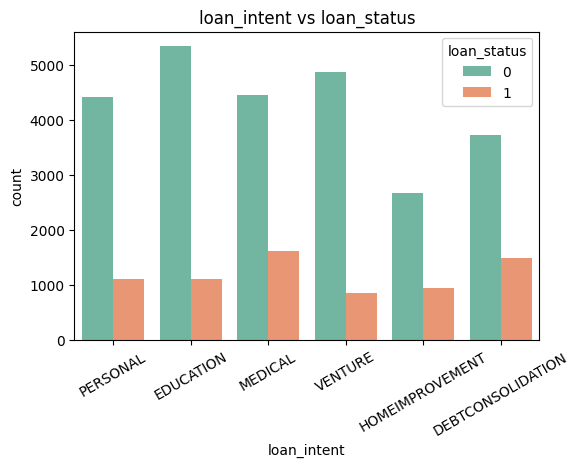

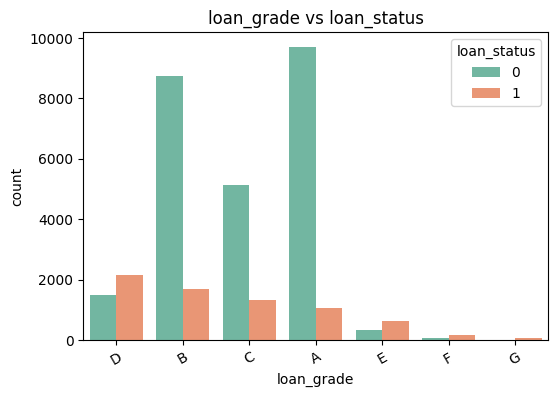

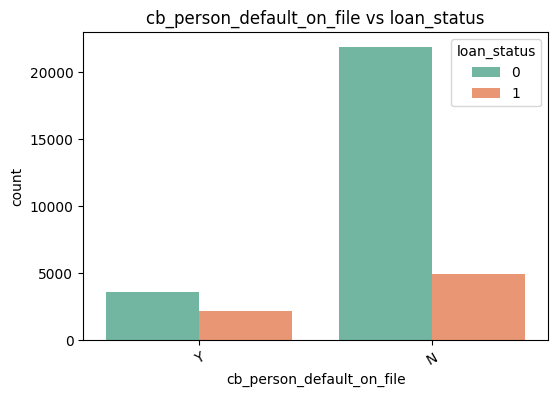


✅ EDA complete.
Next step: Data Preprocessing (handling missing values, encoding, scaling, etc.)


In [3]:
# ================================
# Notebook 2: Exploratory Data Analysis
# ================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

DATA_PATH = "/Users/mr.engineer/Desktop/Code/DSPROJECT/CREDITRISK/DATA/credit_risk_dataset.csv"
TARGET = "loan_status"     # 1 = default, 0 = repaid

# 1) Load data
df = pd.read_csv(DATA_PATH)
print("Shape:", df.shape)
display(df.head())

# 2) Basic overview
print("\n--- Numeric columns ---")
num_cols = [c for c in df.columns if pd.api.types.is_numeric_dtype(df[c]) and c != TARGET]
print(num_cols)

print("\n--- Categorical columns ---")
cat_cols = [c for c in df.columns if c not in num_cols + [TARGET]]
print(cat_cols)

# ================================
# 3) Target variable distribution
# ================================
plt.figure(figsize=(5,4))
sns.countplot(x=TARGET, data=df, palette="Set2")
plt.title("Target Variable Distribution")
plt.xlabel("loan_status (0=Repaid, 1=Default)")
plt.ylabel("Count")
plt.show()

# ================================
# 4) Missing values visualization
# ================================
plt.figure(figsize=(10,5))
missing = df.isnull().mean() * 100
missing = missing[missing > 0].sort_values(ascending=False)
sns.barplot(x=missing.values, y=missing.index, color="lightcoral")
plt.title("Missing Values (%) by Column")
plt.xlabel("Percent Missing")
plt.ylabel("Feature")
plt.show()

# ================================
# 5) Numeric variable distributions
# ================================
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col].dropna(), kde=True, bins=30, color="skyblue")
    plt.title(f"Distribution of {col}")
    plt.show()

# ================================
# 6) Boxplots vs Target
# ================================
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=TARGET, y=col, data=df, palette="Set3")
    plt.title(f"{col} vs {TARGET}")
    plt.show()

# ================================
# 7) Correlation heatmap (numeric)
# ================================
plt.figure(figsize=(8,6))
corr = df[num_cols + [TARGET]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (numeric features)")
plt.show()

# ================================
# 8) Categorical variables vs Target
# ================================
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue=TARGET, data=df, palette="Set2")
    plt.title(f"{col} vs {TARGET}")
    plt.xticks(rotation=30)
    plt.legend(title="loan_status")
    plt.show()

# ================================
# 9) Bivariate relationships (optional)
# ================================
# pairplot only for small number of numeric columns
if len(num_cols) <= 5:
    sns.pairplot(df[num_cols + [TARGET]], hue=TARGET, palette="Set2")
    plt.show()

# ================================
# 10) Quick summary conclusions
# ================================
print("\n✅ EDA complete.")
print("Next step: Data Preprocessing (handling missing values, encoding, scaling, etc.)")
